In [24]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_1samp
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [42]:
#Load and Inspect Dataset
# Commit 2: Load dataset and perform initial inspection
df = pd.read_csv("Liver_cancer.csv")

df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   bmi                      5000 non-null   float64
 3   alcohol_consumption      5000 non-null   object 
 4   smoking_status           5000 non-null   object 
 5   hepatitis_b              5000 non-null   int64  
 6   hepatitis_c              5000 non-null   int64  
 7   liver_function_score     5000 non-null   float64
 8   alpha_fetoprotein_level  5000 non-null   float64
 9   cirrhosis_history        5000 non-null   int64  
 10  family_history_cancer    5000 non-null   int64  
 11  physical_activity_level  5000 non-null   object 
 12  diabetes                 5000 non-null   int64  
 13  liver_cancer             5000 non-null   int64  
dtypes: float64(3), int64(7),

,age,bmi,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,diabetes,liver_cancer
count,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,25.90464,0.15120,0.095800,65.203900,15.109424,0.301600,0.241400,0.199200,0.217800
std,15.799224,5.10520,0.35828,0.294346,14.875477,15.196809,0.458998,0.427975,0.399439,0.412792
min,30.000000,8.10000,0.00000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,22.50000,0.00000,0.000000,54.800000,4.357500,0.000000,0.000000,0.000000,0.000000
50%,57.000000,25.90000,0.00000,0.000000,65.200000,10.340000,0.000000,0.000000,0.000000,0.000000
75%,71.000000,29.30000,0.00000,0.000000,75.200000,21.010000,1.000000,0.000000,0.000000,0.000000
max,84.000000,43.70000,1.00000,1.000000,115.700000,136.800000,1.000000,1.000000,1.000000,1.000000


In [43]:
# Descriptive Statistics Function 
# Commit 3: Descriptive statistics function
def desc_stat(data, field):
    mean_value = data[field].mean()
    median_value = data[field].median()
    mode_value = data[field].mode()[0]
    std_dev = data[field].std()
    min_value = data[field].min()
    max_value = data[field].max()

    return pd.DataFrame({
        "Mean": [mean_value],
        "Median": [median_value],
        "Mode": [mode_value],
        "Std Dev": [std_dev],
        "Min": [min_value],
        "Max": [max_value]
    })

desc_stat(df, "age")


,Mean,Median,Mode,Std Dev,Min,Max
0,57.2228,57.0,64,15.799224,30,84


In [44]:
#Random Sampling
# Commit 4: Random and systematic sampling

sample_random = df.sample(n=200, replace=False, random_state=42)
sample_random.head()

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
1501,80,Female,25.0,Never,Former,1,0,36.1,4.54,0,0,Low,0,0
2586,74,Male,17.9,Regular,Former,0,0,53.8,4.35,0,0,Low,1,0
2653,42,Female,28.7,Occasional,Former,0,0,46.9,9.29,0,1,Low,0,0
1055,76,Female,18.8,Never,Never,0,0,58.8,11.29,1,0,Low,0,0
705,68,Male,25.7,Never,Current,0,0,85.5,17.60,1,0,Low,1,1


In [28]:
#Systematic Sampling
step = 50
sample_systematic = df.iloc[::step]
sample_systematic.head()

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
50,47,Male,31.2,Never,Former,0,0,71.9,6.41,0,0,Moderate,0,0
100,53,Female,26.4,Regular,Never,0,0,63.7,0.13,0,0,High,0,0
150,43,Male,22.2,Regular,Never,0,0,71.1,3.08,0,0,High,0,0
200,57,Male,29.2,Never,Never,1,0,83.1,37.11,1,0,Low,0,0


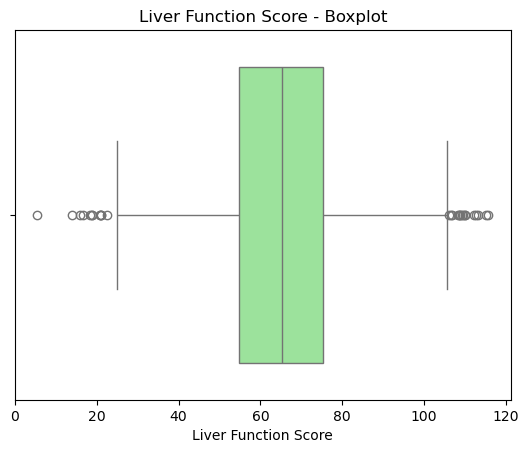

In [45]:
#Boxplot
#Commit 5: Data visualizations - boxplot, scatter, histogram
sns.boxplot(x=df["liver_function_score"] , color='lightgreen') 
plt.title("Liver Function Score - Boxplot")
plt.xlabel("Liver Function Score")
plt.show()

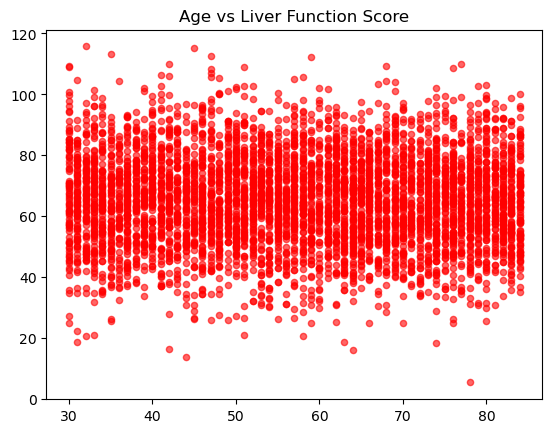

In [30]:
#scatter plot
plt.scatter(df["age"], df["liver_function_score"], color='red', s=20, alpha=0.6)
plt.title("Age vs Liver Function Score")
plt.show()


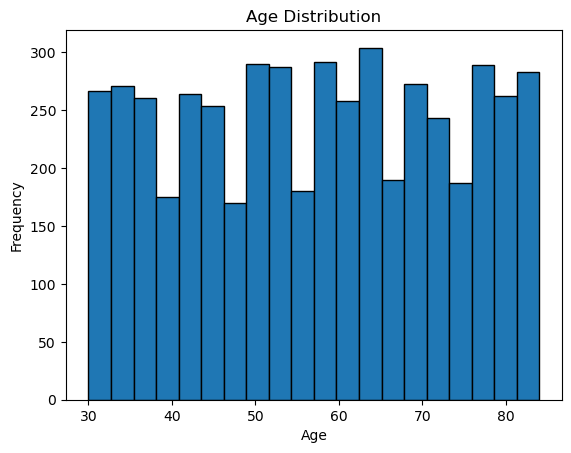

In [31]:
#Histogram
plt.hist(df["age"], bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [47]:
#Pearson & Spearman Correlation
#Pearson and Spearman correlation analysis
pearson_r, pearson_p = pearsonr(df["age"], df["liver_function_score"])
spearman_rho, spearman_p = spearmanr(df["age"], df["liver_function_score"])
pearson_r, pearson_p, spearman_rho, spearman_p

(np.float64(-0.02372445142414665),
 np.float64(0.09346650169830062),
 np.float64(-0.023566540879877196),
 np.float64(0.09566943948770758))

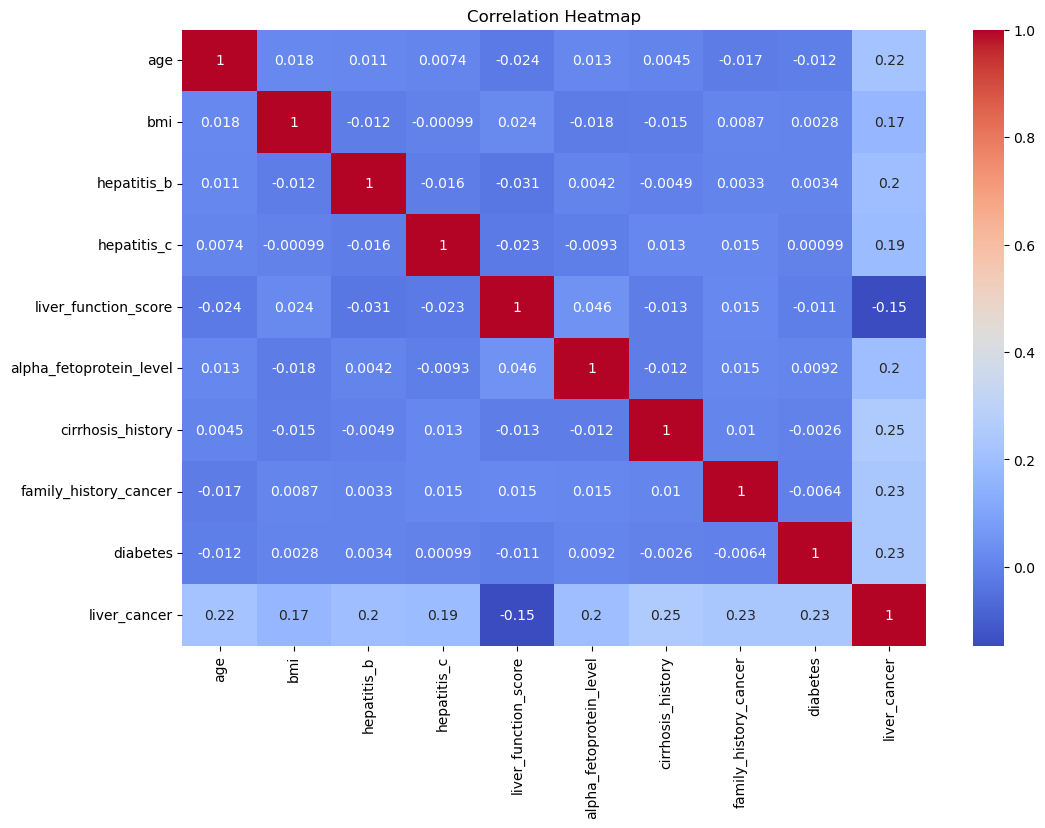

In [48]:
#heatmap
# Commit 7: Correlation heatmap for numeric features
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [49]:
from scipy.stats import pearsonr, spearmanr

# Pearson Correlation (example: age vs liver_function_score)
pearson_r, pearson_p = pearsonr(df["age"], df["liver_function_score"])
print("Pearson Correlation (age vs liver function score):")
print(f"r = {pearson_r:.3f}, p-value = {pearson_p:.6f}")

# Spearman Correlation (example: bmi vs alpha_fetoprotein_level)
spearman_r, spearman_p = spearmanr(df["bmi"], df["alpha_fetoprotein_level"])
print("\nSpearman Correlation (BMI vs AFP level):")
print(f"r = {spearman_r:.3f}, p-value = {spearman_p:.6f}")


Pearson Correlation (age vs liver function score):
r = -0.024, p-value = 0.093467

Spearman Correlation (BMI vs AFP level):
r = -0.004, p-value = 0.793532


In [50]:
#Chi-Square Test (Categorical Variables)
# Commit 8: Chi-Square test between gender and liver cancer
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['gender'], df['liver_cancer'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic = {chi2:.3f}")
print(f"P-value = {p:.6f}")
print(f"Degrees of Freedom = {dof}")



Chi-Square Test Results:
Chi-Square Statistic = 0.000
P-value = 0.983227
Degrees of Freedom = 1


In [51]:
#Hypothesis Testing (One-Sample t-Test)
# Commit 9: One-sample t-test for BMI

from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(df["bmi"], 25)

print("\nOne-Sample t-Test on BMI:")
print(f"T-statistic = {t_stat:.3f}")
print(f"P-value = {p_value:.6f}")


One-Sample t-Test on BMI:
T-statistic = 12.530
P-value = 0.000000


In [54]:
# STEP A: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# STEP B: Load Dataset
df = pd.read_csv("Liver_cancer.csv")

# STEP C: Encode Categorical Columns
# Commit 10: Encode categorical variables with LabelEncoder

encoder = LabelEncoder()

df["gender_encoded"] = encoder.fit_transform(df["gender"])
df["alcohol_encoded"] = encoder.fit_transform(df["alcohol_consumption"])
df["smoking_encoded"] = encoder.fit_transform(df["smoking_status"])
df["physical_encoded"] = encoder.fit_transform(df["physical_activity_level"])

# STEP D: Select Features and Target
# Commit 11: Train-test split and feature scaling
X = df[[
    "age", "gender_encoded", "bmi",
    "alcohol_encoded", "smoking_encoded",
    "hepatitis_b", "hepatitis_c",
    "liver_function_score", "alpha_fetoprotein_level",
    "cirrhosis_history", "physical_encoded", "diabetes"
]]

y = df["liver_cancer"]

# STEP E: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# STEP F: Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# STEP G: Train Logistic Regression Model
# Commit 12: Logistic Regression model
classifier = LogisticRegression(max_iter=2000)
classifier.fit(X_train, y_train)

# STEP H: Predict on Test Set
y_pred = classifier.predict(X_test)

# STEP I: Evaluate Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))


Confusion Matrix:
[[933  41]
 [114 162]]

Model Accuracy: 87.60%


In [55]:
#K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Commit 13: K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("\nKNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))



KNN Accuracy: 0.8464
Confusion Matrix:
[[938  36]
 [156 120]]


In [39]:
#Naïve Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

print("\nNaïve Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_pred))



Naïve Bayes Accuracy: 0.8232
Confusion Matrix:
[[879  95]
 [126 150]]


In [40]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("\nDecision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))



Decision Tree Accuracy: 0.8624
Confusion Matrix:
[[896  78]
 [ 94 182]]


In [41]:
# K-Means Clustering
from sklearn.cluster import KMeans

# Select features for clustering
X_cluster = df[["age", "bmi", "liver_function_score"]].copy()

# Ensure numeric and handle missing values
X_cluster = X_cluster.apply(pd.to_numeric, errors='coerce')  # convert if needed
X_cluster = X_cluster.fillna(X_cluster.mean())               # fill NaNs with mean

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["kmeans_cluster"] = kmeans.fit_predict(X_cluster)

# Show cluster centers and means
print("\nK-Means Cluster Centers:")
print(kmeans.cluster_centers_)

print("\nK-Means Cluster Means:")
print(df.groupby("kmeans_cluster")[["age", "bmi", "liver_function_score"]].mean())


K-Means Cluster Centers:
[[69.12508059 25.87330754 52.95319149]
 [41.37267705 25.77383225 64.40200904]
 [66.20576132 26.11659808 79.33106996]]

K-Means Cluster Means:
                      age        bmi  liver_function_score
kmeans_cluster                                            
0               69.159281  25.884650             53.008028
1               41.350957  25.772105             64.367271
2               66.101579  26.106658             79.377213


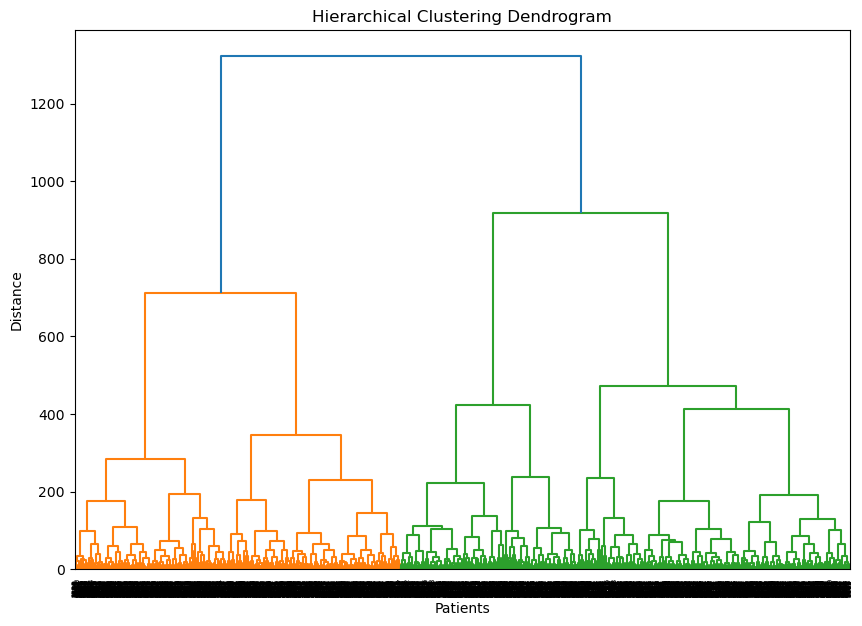


Hierarchical Cluster Means:
                  age        bmi  liver_function_score
hc_cluster                                            
0           72.664129  26.071979             63.525547
1           44.888319  25.860399             56.765071
2           47.764654  25.664829             81.247682


In [82]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Use numeric features only
X_cluster = df[["age", "bmi", "liver_function_score"]].copy()
X_cluster = X_cluster.apply(pd.to_numeric, errors='coerce')
X_cluster = X_cluster.fillna(X_cluster.mean())

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_cluster, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Patients")
plt.ylabel("Distance")
plt.show()

# Agglomerative clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df["hc_cluster"] = hc.fit_predict(X_cluster)

# Show means of numeric features only
print("\nHierarchical Cluster Means:")
print(df.groupby("hc_cluster")[["age", "bmi", "liver_function_score"]].mean())
